<h2 align=center> Facial Expression Recognition with Keras</h2>

### Task 1: Import Libraries

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
#from livelossplot import PlotLossesTensorFlowKeras
from livelossplot import PlotLossesKeras
import tensorflow as tf
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.2.0


### Task 2: Plot Sample Image

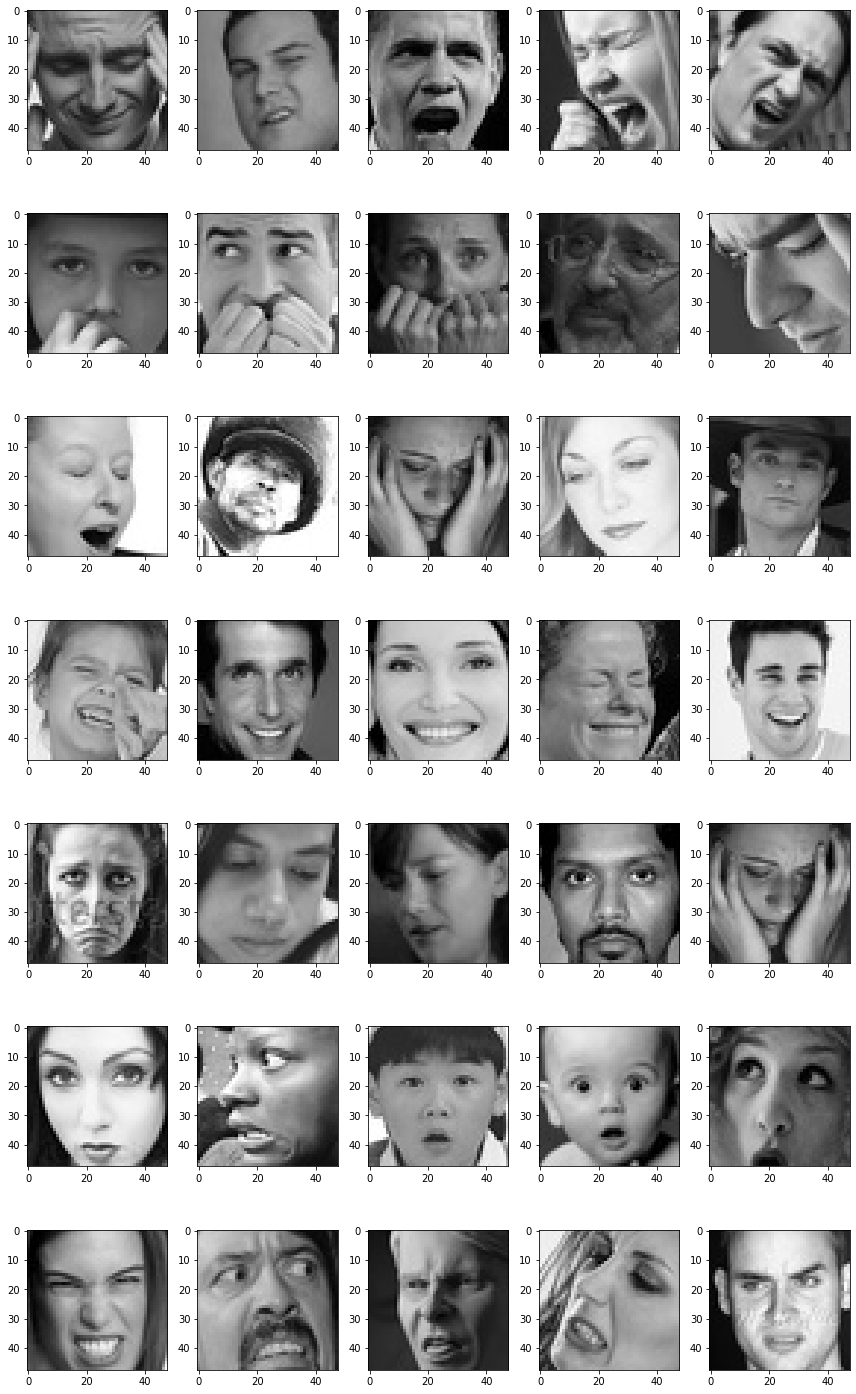

In [2]:
utils.datasets.fer.plot_example_images(plt).show()

In [4]:
for expression in os.listdir("train/"):
    print(str(len(os.listdir("train/"+expression)))+" "+expression+" images")

3995 angry images
4097 fear images
4965 neutral images
7215 happy images
4830 sad images
3171 surprise images
436 disgust images


### Task 3: Generate Training and Validation Batches

In [5]:
img_size=48
batch_size=64

datagen_train=ImageDataGenerator(horizontal_flip=True)
train_generator=datagen_train.flow_from_directory("train/",
                                                 target_size=(img_size,img_size),
                                                 color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

img_size=48
batch_size=64

datagen_vallidation=ImageDataGenerator(horizontal_flip=True)
validation_generator=datagen_train.flow_from_directory("test/",
                                                 target_size=(img_size,img_size),
                                                 color_mode='grayscale',
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


### Task 4: Create CNN Model

![](model.png)
Inspired by Goodfellow, I.J., et.al. (2013). Challenged in representation learning: A report of three machine learning contests. *Neural Networks*, 64, 59-63. [doi:10.1016/j.neunet.2014.09.005](https://arxiv.org/pdf/1307.0414.pdf)

In [6]:
model= Sequential()

model.add(Conv2D(64, (3,3),padding='same', input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(7,activation='softmax'))

opt=Adam(lr=0.005)
model.compile(optimizer=opt, loss= 'categorical_crossentropy' , metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

In [17]:
pip install livelossplot

Note: you may need to restart the kernel to use updated packages.


In [8]:


pip install livelossplot==0.5.2

  Attempting uninstall: livelossplot
    Found existing installation: livelossplot 0.5.3
    Uninstalling livelossplot-0.5.3:
      Successfully uninstalled livelossplot-0.5.3
Note: you may need to restart the kernel to use updated packages.


### Task 6: Train and Evaluate Model

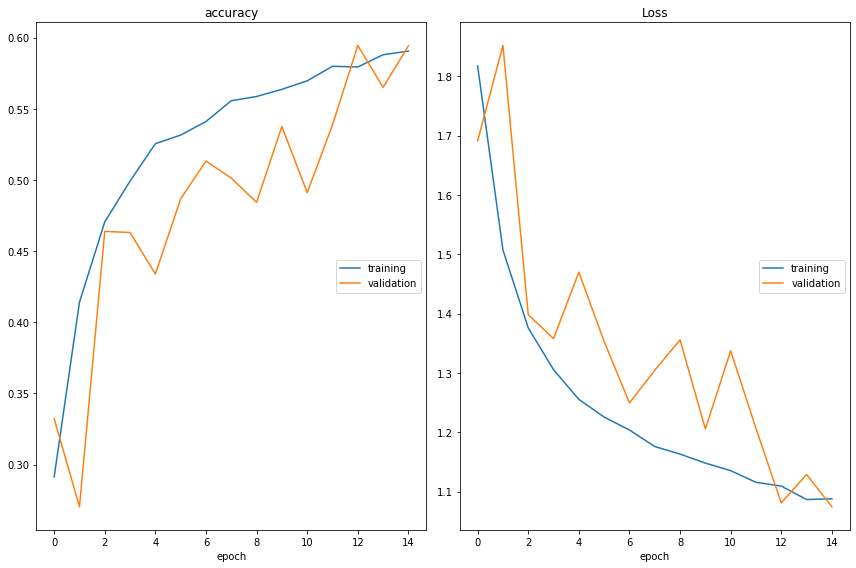

accuracy
	training         	 (min:    0.291, max:    0.590, cur:    0.590)
	validation       	 (min:    0.270, max:    0.594, cur:    0.594)
Loss
	training         	 (min:    1.087, max:    1.817, cur:    1.088)
	validation       	 (min:    1.075, max:    1.852, cur:    1.075)

Epoch 00015: saving model to model weights.h5
448/448 [==============================] - 876s 2s/step - loss: 1.0880 - accuracy: 0.5905 - val_loss: 1.0746 - val_accuracy: 0.5942 - lr: 0.0050


In [14]:
epochs=15
steps_per_epochs= train_generator.n//train_generator.batch_size
validation_steps=validation_generator.n//validation_generator.batch_size

checkpoint=ModelCheckpoint("model weights.h5", monitor= 'val accuracy',
                          save_weights_only=True, mode='max', verbose=1)
reduce_lr=ReduceLROnPlateau(monitor='val loss', factor=0.1,patience=2,min_lr=0.00001, model='auto')

callbacks= [PlotLossesKeras(), checkpoint , reduce_lr]

history= model.fit(
  x=train_generator, 
  steps_per_epoch=steps_per_epochs,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps,
    callbacks=callbacks
)

### Task 7: Represent Model as JSON String